
Progetto: RealEstateAI Solutions - Valutazione dei Prezzi Immobiliari

Descrizione:
Questo progetto mira a ottimizzare la valutazione dei prezzi immobiliari utilizzando tecniche avanzate di regolarizzazione in modelli di regressione lineare. L'obiettivo è quello di fornire previsioni di prezzo più accurate e affidabili, riducendo il rischio di overfitting e migliorando la capacità di generalizzazione del modello.

Dataset:
Il dataset utilizzato contiene informazioni sui prezzi e le caratteristiche di varie proprietà immobiliari, come superficie, numero di camere, presenza di servizi, ecc.

Passaggi Principali:
1. Preparazione del Dataset:
   - Caricamento e preprocessamento dei dati.
   - Gestione dei valori mancanti e codifica delle variabili categoriche.
   - Normalizzazione e scalatura dei dati.

2. Implementazione dei Modelli di Regressione:
   - Implementazione e addestramento di modelli di regressione con tecniche di regolarizzazione: Ridge, Lasso ed Elastic Net.

3. Valutazione delle Performance:
   - Utilizzo di tecniche di validazione incrociata per valutare le performance dei modelli.
   - Calcolo del Mean Squared Error (MSE) e del coefficiente di determinazione R² per ciascun modello.
   - Confronto della complessità dei modelli valutando i coefficienti non nulli.

4. Visualizzazione dei Risultati:
   - Creazione di grafici per visualizzare e confrontare le performance dei modelli.
   - Visualizzazione della distribuzione dei residui per valutare l'adeguatezza del modello.
   - Analisi dell'andamento dei coefficienti rispetto ai parametri di regolarizzazione.

Note:
- Il progetto include commenti dettagliati che spiegano i vari passaggi, le scelte fatte e i risultati ottenuti, per garantire trasparenza e replicabilità del lavoro.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

BASE_URL= "https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv"

RANDOM_SEED=0

df=pd.read_csv(BASE_URL)



# PREPARAZIONE DEL DATASET

## PRIMA PARTE PREPROCESSING DEI DATI : GESTIONE DEI MANCANTI

In [ ]:


# Calcolo il numero di righe con almeno un valore mancante
num_missing_rows = df.isnull().any(axis=1).sum()

# Calcolo la percentuale di righe con valori mancanti
missing_percentage = (num_missing_rows / df.shape[0]) * 100

# Soglia per eliminare direttamente le righe
threshold = 20

if missing_percentage < threshold:
    # Elimina le righe con valori mancanti
    df = df.dropna()
else:
    # Gestisci i valori mancanti per colonna
    for column in df.columns:
        # Determina il tipo di colonna
        unique_values = df[column].dropna().unique()

        # Se la colonna è binaria (due valori unici)
        if len(unique_values) == 2:
            df[column] = df[column].fillna(df[column].mode()[0])
        # Se la colonna è categorica (oggetto o stringa)
        elif df[column].dtype == 'object':
            df[column] = df[column].fillna(df[column].mode()[0])
        # Se la colonna è numerica
        else:
            df[column] = df[column].fillna(df[column].mean())

## SECONDA PARTE PREPROCESSING DEI DATI: GESTIONE DELLE VARIABILI CATEGORICHE

In [ ]:
# Identifica le colonne categoriche
categorical_columns = df.select_dtypes(include=['object']).columns

# Applica One-Hot Encoding utilizzando pd.get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

## TERZA PARTE PREPROCESSING DEI DATI: NORMALIZZO I DATI

In [ ]:
# Crea un'istanza di MinMaxScaler
# MinMaxScaler normalizza i dati scalando ogni caratteristica
# in un range specifico, tipicamente tra 0 e 1.
mms = MinMaxScaler()

# Applica il MinMaxScaler al DataFrame `df_encoded`
# Utilizza il metodo fit_transform per adattare lo scaler
# ai dati e simultaneamente trasformarli. Questo metodo
# calcola il minimo e il massimo di ogni caratteristica
# e li usa per scalare i dati.
# `df_encoded.columns` è utilizzato per selezionare tutte
# le colonne di `df_encoded` a cui vogliamo applicare il
# processo di normalizzazione; in questo caso tutte le colonne
df_encoded[df_encoded.columns] = mms.fit_transform(df_encoded[df_encoded.columns])

# Dopo la normalizzazione, tutte le caratteristiche di `df_encoded`
# avranno valori compresi tra 0 e 1.

# IMPLEMENTAZIONE DEI MODELLI DI REGRESSIONE

In [ ]:
# Separiamo le variabili indipendenti (features) dalla variabile dipendente (target)
# X contiene tutte le colonne tranne 'price', mentre y contiene solo la colonna 'price'
X = df_encoded.drop('price', axis=1).values
y = df_encoded['price'].values

# Suddividiamo il dataset in set di addestramento e di test
# Utilizziamo il 70% dei dati per l'addestramento e il 30% per il test
# Impostiamo un valore di RANDOM_SEED per garantire che i risultati siano riproducibili
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

# Creiamo un'istanza di StandardScaler per standardizzare le features
# La standardizzazione è utile per garantire che tutte le features abbiano una media di 0 e una deviazione standard di 1
ss = StandardScaler()

# Applichiamo la standardizzazione ai dati di addestramento
# fit_transform calcola i parametri di standardizzazione (media e deviazione standard) e applica la trasformazione
X_train = ss.fit_transform(X_train)

# Applichiamo la stessa trasformazione ai dati di test
# transform utilizza i parametri calcolati sui dati di addestramento per trasformare i dati di test
X_test = ss.transform(X_test)


## RIDGE REGRESSION

In [ ]:
# Creiamo un modello di regressione Ridge
# Ridge è una tecnica di regressione lineare che include un termine di regolarizzazione L2
# La regolarizzazione aiuta a prevenire l'overfitting penalizzando i coefficienti troppo grandi
# Impostiamo il parametro alpha a 10, che determina il peso della penalizzazione
model_ridge = Ridge(alpha=10.0)

# Addestriamo il modello di regressione Ridge utilizzando il set di addestramento
# X_train contiene le features di addestramento e y_train contiene i corrispondenti valori target
model_ridge.fit(X_train, y_train)


Ridge(alpha=10.0)

## LASSO REGRESSION

In [ ]:
# Creiamo un modello di regressione Lasso
# Lasso è una tecnica di regressione lineare che include un termine di regolarizzazione L1
# La regolarizzazione L1 aiuta a prevenire l'overfitting e può portare a modelli più semplici eliminando alcuni coefficienti (impostandoli a zero)
# Impostiamo il parametro alpha a 0.01, che determina il peso della penalizzazione
model_lasso = Lasso(alpha=0.01)

# Addestriamo il modello di regressione Lasso utilizzando il set di addestramento
# X_train contiene le features di addestramento e y_train contiene i corrispondenti valori target
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

## ELASTIC NET

In [ ]:
# Importiamo la classe ElasticNet da scikit-learn
from sklearn.linear_model import ElasticNet

# Creiamo un modello di regressione Elastic Net
# Elastic Net combina le proprietà delle regolarizzazioni Lasso (L1) e Ridge (L2)
# 'alpha' è il parametro che controlla l'intensità complessiva della penalizzazione
# In questo caso, 'alpha=1.' indica una penalizzazione moderata 'l1_ratio' è
# il parametro che bilancia la regolarizzazione L1 e L2 (in questo caso con un
# l1_ratio=0.5 ottengo un equilibrio tra L1 e L2)
model_elastic_net = ElasticNet(alpha=1., l1_ratio=0.5)

# Addestriamo il modello di regressione Elastic Net utilizzando il set di addestramento
# 'X_train' contiene le caratteristiche di addestramento
# 'y_train' contiene i corrispondenti valori target
# Il metodo fit esegue l'ottimizzazione per trovare i coefficienti migliori che minimizzano l'errore con la penalizzazione specificata
model_elastic_net.fit(X_train, y_train)


ElasticNet()

# VALUTAZIONE DELLE PERFORMANCE

## TECNICHE DI VALIDAZIONE INCROCIATA

In [ ]:
# Definiamo il numero di fold per la cross-validation
k_folds = 5

# Ridge Regression con Cross-Validation usando R^2
ridge_scores_r2 = cross_val_score(model_ridge, X_train, y_train,
                                  cv=k_folds, scoring='r2')
#Andrò a stampare una media dei valori ottenuti così da indicare una singola misura riassuntiva delle prestazioni del modello attraverso tutti i fold della validazione incrociata.
print("Ridge Regression Cross-Validation R^2:", ridge_scores_r2.mean())

# Lasso Regression con Cross-Validation usando R^2
lasso_scores_r2 = cross_val_score(model_lasso, X_train, y_train,
                                  cv=k_folds, scoring='r2')
#Andrò a stampare una media dei valori ottenuti così da indicare una singola misura riassuntiva delle prestazioni del modello attraverso tutti i fold della validazione incrociata.
print("Lasso Regression Cross-Validation R^2:", lasso_scores_r2.mean())

# Elastic Net con Cross-Validation usando R^2
elastic_net_scores_r2 = cross_val_score(model_elastic_net, X_train, y_train,
                                        cv=k_folds, scoring='r2')
#Andrò a stampare una media dei valori ottenuti così da indicare una singola misura riassuntiva delle prestazioni del modello attraverso tutti i fold della validazione incrociata.
print("Elastic Net Cross-Validation R^2:", elastic_net_scores_r2.mean())



Ridge Regression Cross-Validation R^2: 0.6260178258225755
Lasso Regression Cross-Validation R^2: 0.601163287255018
Elastic Net Cross-Validation R^2: -0.005299987897273572


## CALCOLO DEL MSE PER I DIVERSI MODELLI

In [ ]:
# Calcolo l'errore quadratico medio per il modello di Ridge Regression
# mean_squared_error è una funzione che confronta i valori reali di y_test con quelli predetti dal model_ridge
# model_ridge.predict(X_test) predice i valori di output utilizzando il modello di Ridge Regression addestrato
print(f"Mean Squared Error for Ridge Regression: {mean_squared_error(y_test, model_ridge.predict(X_test))}")

# Calcolo l'errore quadratico medio per il modello di Lasso Regression
# mean_squared_error confronta i valori reali di y_test con quelli predetti dal model_lasso
# model_lasso.predict(X_test) predice i valori di output utilizzando il modello di Lasso Regression addestrato
print(f"Mean Squared Error for Lasso Regression: {mean_squared_error(y_test, model_lasso.predict(X_test))}")

# Calcolo l'errore quadratico medio per il modello di Elastic Net
# mean_squared_error confronta i valori reali di y_test con quelli predetti dal model_elastic_net
# model_elastic_net.predict(X_test) predice i valori di output utilizzando il modello di Elastic Net addestrato
print(f"Mean Squared Error for Elastic Net: {mean_squared_error(y_test, model_elastic_net.predict(X_test))}")


Mean Squared Error for Ridge Regression: 0.007181450325783227
Mean Squared Error for Lasso Regression: 0.00714050286455417
Mean Squared Error for Elastic Net: 0.026002480269825195


## CONFRONTO DELLA COMPLESSITA' DEI MODELLI ATTRAVERSO VALUTAZIONE COEFFICIENTI NON NULLI

In [ ]:
# Conto i coefficienti non nulli usando una list comprehension
# coef!=0 restituisce True e quindi 1 per i valori non nulli che andrò a sommare nelle variabili modello_nonzero
lasso_nonzero = sum(coef != 0 for coef in model_lasso.coef_)
ridge_nonzero = sum(coef != 0 for coef in model_ridge.coef_)
elastic_net_nonzero = sum(coef != 0 for coef in model_elastic_net.coef_)

# Stampo i risultati
print(f"Lasso non-zero coefficients: {lasso_nonzero}")
print(f"Ridge non-zero coefficients: {ridge_nonzero}")
print(f"Elastic Net non-zero coefficients: {elastic_net_nonzero}")

Lasso non-zero coefficients: 12
Ridge non-zero coefficients: 12
Elastic Net non-zero coefficients: 0


## ANALISI E CONFRONTO DEI RISULTATI OTTENUTI CON I VARI METODI DI REGOLARIZZAZIONE

In [ ]:

# Genero una funzione che mi consenta di valtuare i modelli
def evaluate_model(model, X_test, y_test):
    # Predico i valori di output
    y_pred = model.predict(X_test)

    # Calcolo l'errore quadratico medio
    mse = mean_squared_error(y_test, y_pred)

    # Calcolo il coefficiente di determinazione R²
    r2 = r2_score(y_test, y_pred)

    return mse, r2

# Valuto il modello Lasso
lasso_mse, lasso_r2 = evaluate_model(model_lasso, X_test, y_test)
print(f"Lasso MSE: {lasso_mse}, R²: {lasso_r2}")

# Valuto il modello Ridge
ridge_mse, ridge_r2 = evaluate_model(model_ridge, X_test, y_test)
print(f"Ridge MSE: {ridge_mse}, R²: {ridge_r2}")

# Valuto il modello Elastic Net
elastic_net_mse, elastic_net_r2 = evaluate_model(model_elastic_net, X_test, y_test)
print(f"Elastic Net MSE: {elastic_net_mse}, R²: {elastic_net_r2}")

# Memorizzo i risultati in un dizionario che mi serve per individuare il modello migliore:
results = {
    'Lasso': evaluate_model(model_lasso, X_test, y_test),
    'Ridge': evaluate_model(model_ridge, X_test, y_test),
    'Elastic Net': evaluate_model(model_elastic_net, X_test, y_test)
}

# Trovo il modello con il miglior MSE mediante una lambda function
best_mse_model = min(results, key=lambda k: results[k][0])
# Trovo il valore del miglior mse
best_mse_value = results[best_mse_model][0]

# Trovo il modello con il miglior R² mediante una lambda function
best_r2_model = max(results, key=lambda k: results[k][1])
#Trovo il valore del miglior R²
best_r2_value = results[best_r2_model][1]

# Stampo i risultati
print(f"Best Model (MSE): {best_mse_model} with MSE = {best_mse_value}")
print(f"Best Model (R²): {best_r2_model} with R² = {best_r2_value}")

Lasso MSE: 0.00714050286455417, R²: 0.7253897815087224
Ridge MSE: 0.007181450325783227, R²: 0.7238150196903925
Elastic Net MSE: 0.026002480269825195, R²: -6.151339547733059e-06
Best Model (MSE): Lasso with MSE = 0.00714050286455417
Best Model (R²): Lasso with R² = 0.7253897815087224


# VISUALIZZAZIONE DEI RISULTATI

## CREAZIONE DI GRAFICI PER VISUALIZZARE E CONFRONTARE LE PERFORMANCE DEI MODELLI

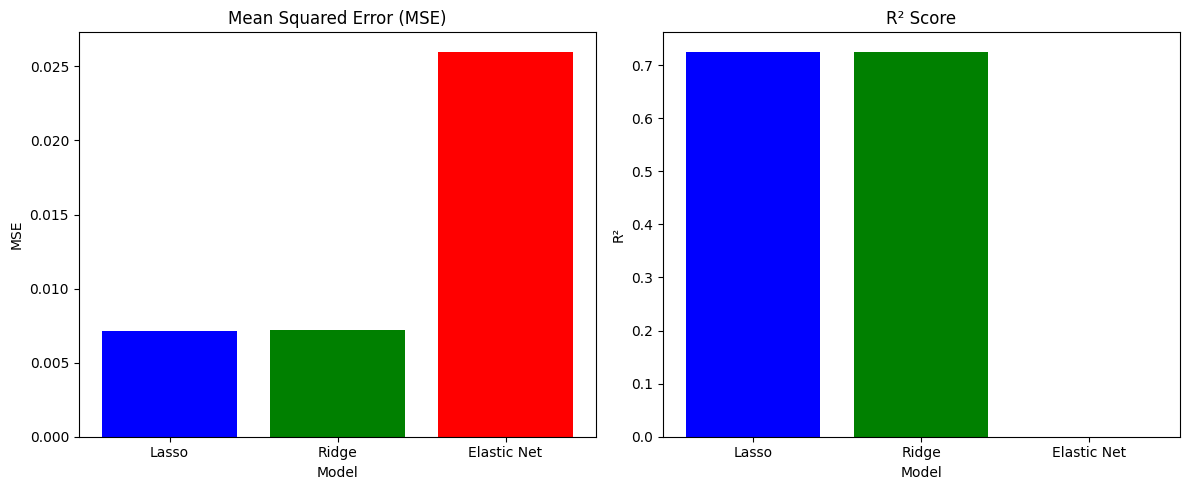

In [ ]:
# Nomi dei modelli
model_names = ['Lasso', 'Ridge', 'Elastic Net']

# MSE e R² per ciascun modello
mse_values = [lasso_mse, ridge_mse, elastic_net_mse]
r2_values = [lasso_r2, ridge_r2, elastic_net_r2]

# Creo un grafico a barre per MSE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values, color=['blue', 'green', 'red'])
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')

# Creo un grafico a barre per R²
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color=['blue', 'green', 'red'])
plt.title('R² Score')
plt.xlabel('Model')
plt.ylabel('R²')

plt.tight_layout()
plt.show()


## VISUALIZZAZIONE DELLA DISTRIBUZIONE DEI RESIDUI PER VALUTARE L'ADEGUATEZZA DEL MODELLO

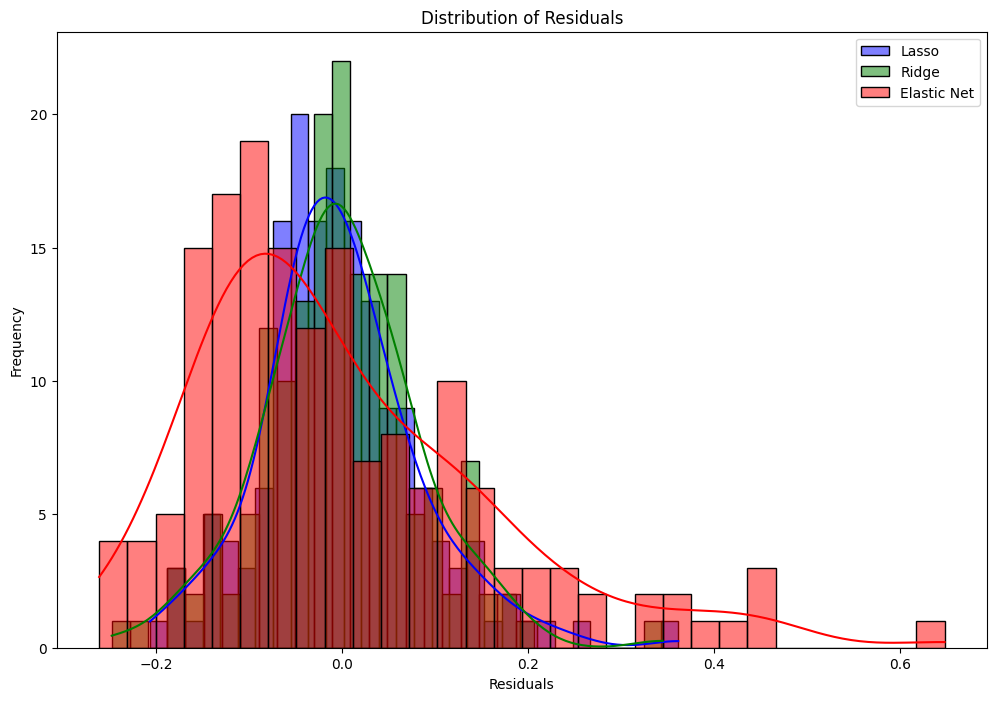

In [ ]:
# Calcolo i residui per ciascun modello
lasso_residuals = y_test - model_lasso.predict(X_test)
ridge_residuals = y_test - model_ridge.predict(X_test)
elastic_net_residuals = y_test - model_elastic_net.predict(X_test)

# Creo un istogramma per i residui
plt.figure(figsize=(12, 8))

sns.histplot(lasso_residuals, bins=30, color='blue', label='Lasso', kde=True)
sns.histplot(ridge_residuals, bins=30, color='green', label='Ridge', kde=True)
sns.histplot(elastic_net_residuals, bins=30, color='red', label='Elastic Net', kde=True)

plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## VISUALIZZAZIONE DELL'ANDAMENTO DEI COEFFICIENTI DEI MODELLI RISPETTO AI PARAMETRI DI REGOLARIZZAZIONE

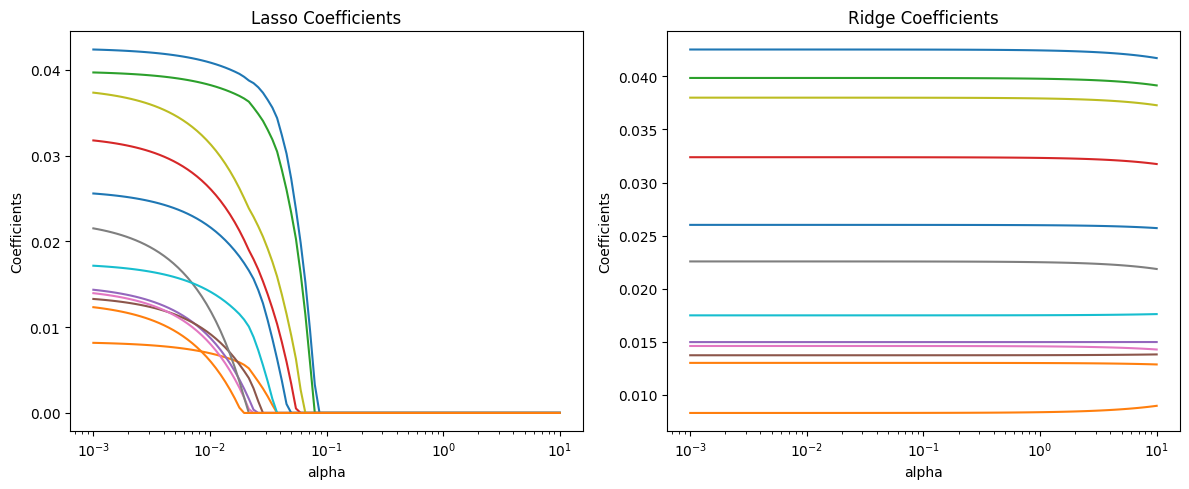

In [ ]:
#Genero un range di valori per alpha

alphas = np.logspace(-3, 1, 100)

lasso_coefs = []
ridge_coefs = []

for alpha in alphas:
    # Addestro modelli Lasso e Ridge per ogni valore di alpha
    lasso = Lasso(alpha=alpha, max_iter=10000)
    ridge = Ridge(alpha=alpha)

    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)

    lasso_coefs.append(lasso.coef_)
    ridge_coefs.append(ridge.coef_)

# Converto in array per una migliore manipolazione
lasso_coefs = np.array(lasso_coefs)
ridge_coefs = np.array(ridge_coefs)

# Grafico dei coefficienti Lasso
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.title('Lasso Coefficients')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.axis('tight')

# Grafico dei coefficienti Ridge
plt.subplot(1, 2, 2)
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.title('Ridge Coefficients')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.axis('tight')

plt.tight_layout()
plt.show()